# Visualization, interpretation, etc


We will demonstrate two approaches to obtain and load the **soc-sign-bitcoinotc.csv** dataset:


Finally, we will **load** the dataset with NetworkX for inspection.

---
**Dataset Details**:

- **Source URL**: [https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz](https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz)
- The compressed file is `soc-sign-bitcoinotc.csv.gz`, which, when extracted, produces `soc-sign-bitcoinotc.csv`.
- We recommend creating a `Data` subfolder inside `Colab Notebooks` to store the file.



In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import random
from itertools import combinations, product


import utils

In [2]:
! pip install plotly

In [3]:
url = "https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz"
file_path = utils.download_and_extract_data(
    zip_url=url,
    zip_filename="soc-sign-bitcoinotc.csv.gz",
    filetype="csv.gz",
    local_folder="./data",
)

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.


In [4]:
G = nx.DiGraph()
with open(file_path, "r") as f:
    for line in f:
        fields = line.strip().split(",")
        # Adjust if your CSV has additional columns
        src, tgt, w = fields[0], fields[1], fields[2]
        G.add_edge(src, tgt, weight=float(w))

print(f"Number of nodes: {G.number_of_nodes():,}")
print(f"Number of edges: {G.number_of_edges():,}")
edges_sample = list(G.edges(data=True))[:5]
print("Sample edges (with weights):", edges_sample)

nx.write_gexf(
    G,
    "bitcoin_otc_network.gexf",
)

Number of nodes: 5,881
Number of edges: 35,592
Sample edges (with weights): [('6', '2', {'weight': 4.0}), ('6', '5', {'weight': 2.0}), ('6', '4', {'weight': 2.0}), ('6', '7', {'weight': 5.0}), ('6', '114', {'weight': 2.0})]


In [5]:
# Approx 1 minute to run
# nx.draw(G, with_labels=False)

# Unit 4: Visualization, Interpretation, and Communication of Results

In this unit, we will:
- Explore **advanced visualization tools** for complex graphs (Plotly, Gephi, Neo4j Bloom).
- Learn strategies for **interpreting** and **explaining** model predictions to various stakeholders.
- Practice **effective communication** for both technical and non-technical audiences.
- Understand the importance of **reproducibility, transparency, and trust** in graph ML outcomes.



## 4.1 Advanced Visualization Tools for Complex Graphs

### 4.1.1 Overview of Tools
- **Plotly**: Interactive Python-based plotting (2D/3D).
- **Gephi**: Standalone tool for large-scale network visualization.
- **Neo4j Bloom**: Interactive exploration in Neo4j graph database environment.

**Objective**: Understand how these tools help handle a signed, weighted graph with nearly 6k nodes and 35k edges.

### 4.1.2 Plotly for Interactive Python Visualizations
- Installation: `pip install plotly` (if needed)
- Pros: Inline Jupyter usage, interactive plots, good for smaller subgraphs or prototypes.
- Con: Might slow down if you load all 35k edges.

**Real-Life Example**: Visualizing trust vs. distrust edges (color-coded) in the Bitcoin OTC network.


### Explanation

- We created a directed graph `G` from the CSV using `networkx.DiGraph()`.
- Each edge is assigned a `weight` based on the trust score (-10 to +10).
- The dataset has around 5,881 nodes and 35,592 edges, so plotting **all** edges at once might be too large.

---

### Practice Activity: Subset Visualization with Plotly

**Task**:  
1. Create a subgraph of ~200 nodes (e.g., pick random nodes or the top nodes with the highest outdegree).  
2. Use Plotly to color edges by their weight (negative vs. positive).

"Try to accomplish this by writing code that filters nodes and then calls a Plotly function to visualize edges."


In [6]:
# Step 1: Get a subset of nodes for visualization by selecting random
# nodes and going a dfs from each node to get a connected subgraph

seed_size = 3
radius = 2
all_nodes = list(G.nodes())
seed_nodes = random.sample(all_nodes, seed_size)
subset_nodes = set(seed_nodes)
for node in seed_nodes:
    # neihbors at distance `radius`
    neighbors = nx.dfs_tree(G, node, depth_limit=radius)
    subset_nodes.update(neighbors)
H = G.subgraph(subset_nodes).copy()
print(f"Subgraph size: {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")


pos = nx.spring_layout(H, seed=42)  # 2D layout
pos

Subgraph size: 807 nodes, 8574 edges


{'4363': array([-0.32625142,  0.24254003]),
 '1676': array([-0.34957355, -0.04933724]),
 '5367': array([-0.07399795,  0.00142023]),
 '1451': array([-0.21124279,  0.09827675]),
 '5395': array([0.63076454, 0.53101599]),
 '5215': array([0.05888943, 0.61977839]),
 '3820': array([-0.13193296,  0.12593049]),
 '5350': array([-0.25575322, -0.79939312]),
 '5343': array([-0.62419212,  0.03411084]),
 '1490': array([-0.24067427,  0.22664741]),
 '3408': array([ 0.08054034, -0.0170335 ]),
 '2835': array([0.10267948, 0.58448017]),
 '4635': array([-0.11331661,  0.00838226]),
 '882': array([-0.24029896,  0.57274842]),
 '1198': array([-0.16895844,  0.36618555]),
 '5394': array([ 0.46350518, -0.82179981]),
 '5166': array([-0.34357435,  0.67433959]),
 '3321': array([-0.31381011, -0.21124876]),
 '5341': array([-0.03451554, -0.89231879]),
 '5204': array([ 0.89141506, -0.2853519 ]),
 '4315': array([-0.13110764,  0.09141864]),
 '1095': array([-0.410685 , -0.0076426]),
 '1555': array([-0.20880315, -0.00479569]

The `pos` variable above is a dictionary that maps each node to its (x, y) coordinates in the 2D plane. The keys are the node IDs, and the values are tuples containing the x and y coordinates. \


The `networkx` library provides several basic layout algorithms for visualizing graphs. 

| Layout Function              | Description                                   | Typical Use                                  | Common Shortcoming                              |
|-----------------------------|-----------------------------------------------|----------------------------------------------|--------------------------------------------------|
| `arf_layout`                | Unofficial/unknown layout (possibly obsolete) | Rare/legacy usage                            | Not documented; not standard                     |
| `bfs_layout`                | Places nodes by breadth-first levels          | Trees, hierarchy visualization               | Only works on trees; may be sparse               |
| `bipartite_layout`          | Separates two node sets vertically            | Bipartite graphs (e.g. people → events)      | Only works for graphs with bipartite structure   |
| `circular_layout`           | Nodes in a circle                             | Small graphs or cyclic structures            | Poor for dense or large graphs                   |
| `forceatlas2_layout`        | Force-directed layout (needs extra lib)       | Social network or cluster visualization      | Requires external dependency (`fa2`)             |
| `fruchterman_reingold_layout` | Force-directed spring layout                 | General-purpose, good for medium-sized graphs| Slower on large graphs                           |
| `kamada_kawai_layout`       | Energy-based layout using spring forces       | Emphasizes graph structure clarity           | Computationally expensive for large graphs       |
| `multipartite_layout`       | Layered layout for k-partite graphs           | k-partite network visualization              | Assumes partitioning info                        |
| `planar_layout`             | Embeds nodes without crossing edges (if planar) | Planar graphs                                | Fails on non-planar graphs                       |
| `random_layout`             | Random positions                              | Quick testing                                | Not informative or visually useful               |
| `rescale_layout`            | Rescales existing layout to fit in box        | Utility function                             | Not a layout on its own                          |
| `rescale_layout_dict`       | Same as above but returns dict                | Utility function                             | Not used for layout directly                     |
| `shell_layout`              | Nodes in concentric shells                    | Multi-layer or hierarchical groupings        | Manual layer assignment required                 |
| `spectral_layout`           | Uses eigenvectors of adjacency matrix         | Clustered or spectral graph analysis         | May fail on disconnected graphs                  |
| `spiral_layout`             | Places nodes along a spiral                   | Aesthetic for small graphs                   | Unnatural for most real-world graphs             |
| `spring_layout`             | Force-directed (Fruchterman-Reingold)         | Default layout for general graphs            | Random init can vary; slow for large graphs      |

In [7]:
[l for l in dir(nx.layout) if not l.startswith("_") and "layout" in l]

['arf_layout',
 'bfs_layout',
 'bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'fruchterman_reingold_layout',
 'kamada_kawai_layout',
 'multipartite_layout',
 'planar_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spectral_layout',
 'spiral_layout',
 'spring_layout']

The tools below are not part of networkx. In the context of graph visualization, they provide additional functionality.


| Library        | Description                                                              | Typical Use Cases                            | Integration with `networkx`                        |
|----------------|--------------------------------------------------------------------------|-----------------------------------------------|----------------------------------------------------|
| **Graphviz**   | Industry-standard tool for hierarchical and layered graph layouts.       | Flowcharts, dependency trees, DAGs            | Use via `pygraphviz` or `pydot`                    |
| **Gephi**      | Interactive platform for large-scale graph visualization and analysis.   | Social networks, dynamic graphs               | Export NetworkX graphs to GraphML or GEXF          |
| **Cytoscape**  | Specialized in biological network visualization with rich plugin support.| Biological pathways, molecular interactions   | Export to Cytoscape-compatible formats             |
| **Plotly**     | Interactive plotting with support for 2D and 3D graph visualization.      | Web-based interactive network plots           | Visualize NetworkX graphs using `plotly`           |
| **Bokeh**      | Web-friendly interactive visualization library.                          | Dashboards, streaming data visualizations     | Convert NetworkX graphs for Bokeh plotting         |
| **Graph-tool** | High-performance C++ library with Python bindings.                       | Large-scale networks, performance-critical     | Convert between NetworkX and `graph-tool` formats  |
| **iGraph**     | High-performance library with many layout algorithms.                    | Large graphs, community detection             | Use `python-igraph`; convert from/to NetworkX       |
| **NetworKit**  | Designed for efficiency on massive graphs.                               | Huge graphs, real-time analysis               | Convert NetworkX graphs for use with `NetworKit`   |

> ⚠️ Some of these require format conversion between graph libraries.

OK, back to our `H` subgraph. Let's visualize it using the computed `pos` positions

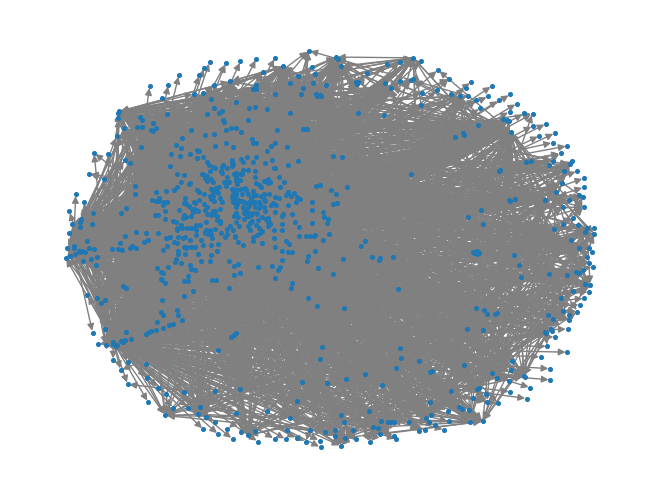

In [8]:
nx.draw(H, pos=pos, node_size=7, edge_color="gray")

For completeness, let's check some other layouts. Some layout functions don't handle well negative edges. We'll remove edge weights for this comparison.

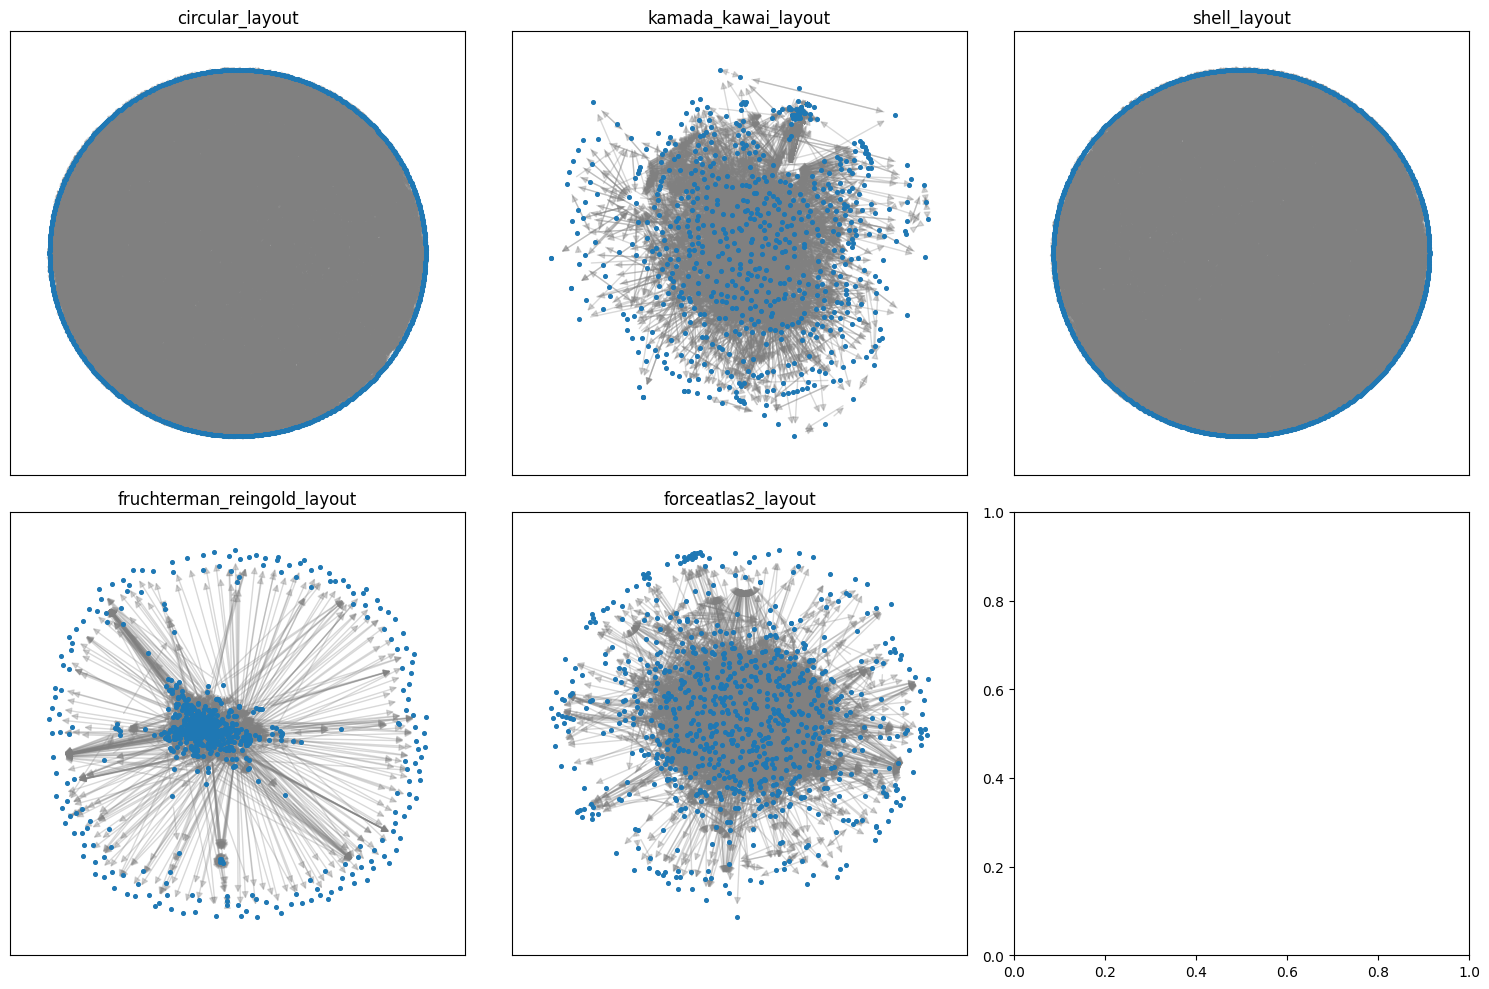

In [9]:
layouts = [
    "circular_layout",
    "kamada_kawai_layout",
    "shell_layout",
    "fruchterman_reingold_layout",
    "forceatlas2_layout",
]

H_no_weights = H.copy()
# remove weight attribute from all edges
for u, v, data in H_no_weights.edges(data=True):
    data.pop("weight", None)

# facet grid
n_cols = 3
n_rows = len(layouts) // n_cols + 1
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()

for i, layout in enumerate(layouts):
    ax = axs[i]
    func = getattr(nx.layout, layout)
    try:
        pos_curr = func(H_no_weights)
        nx.draw_networkx_edges(
            H_no_weights, pos=pos_curr, edge_color="gray", alpha=0.3, ax=ax
        )
        nx.draw_networkx_nodes(H_no_weights, pos=pos_curr, node_size=7, ax=ax)
        ax.set_title(layout)
    except Exception as e:
        print(f"Error with layout {layout}: {e}")
        ax.axis("off")

plt.tight_layout()
plt.show()

### Plotting with `plotly`


`plotly` is a powerful tool for creating interactive plots. It is a Python library that is built on top of `plotly.js`. It is not specifically designed for graph visualization, but it can be used to visualize graphs.
To visualize the graph, we need to extract the edge data and the node positions.

In [10]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Node positions and sizes
node_x = [pos[n][0] for n in H.nodes()]
node_y = [pos[n][1] for n in H.nodes()]
node_text = list(H.nodes())
node_size = np.log10([H.degree(n) + 1 for n in H.nodes()]) * 10

# Create base node scatter using plotly express
fig = px.scatter(
    x=node_x,
    y=node_y,
    size=node_size,
    text=node_text,
    labels={"x": "", "y": ""},
    title="Bitcoin OTC Network (subset)",
    width=800,
    height=800,
)


# Function to extract edge coords by color
def edge_coords(color):
    edge_x, edge_y = [], []
    for u, v, d in H.edges(data=True):
        if (d["weight"] < 0 and color == "red") or (
            d["weight"] >= 0 and color == "green"
        ):
            x0, y0 = pos[u]
            x1, y1 = pos[v]
            edge_x += [x0, x1, None]
            edge_y += [y0, y1, None]
    return edge_x, edge_y


# Add red edges
x_red, y_red = edge_coords("red")
fig.add_trace(
    go.Scatter(
        x=x_red,
        y=y_red,
        mode="lines",
        line=dict(color="red", width=1),
        hoverinfo="none",
        opacity=0.3,
        name="Negative edges",
    )
)

# Add green edges
x_green, y_green = edge_coords("green")
fig.add_trace(
    go.Scatter(
        x=x_green,
        y=y_green,
        mode="lines",
        line=dict(color="green", width=1),
        hoverinfo="none",
        opacity=0.3,
        name="Positive edges",
    )
)

# Tweak layout
fig.update_traces(marker=dict(line=dict(width=0)))  # cleaner node dots
fig.update_layout(showlegend=True)

fig.show()

### Feedback / Sample Discussion

- We used a **spring layout** for a 2D projection.
- **Edge colors** could be improved by segmenting negative vs. positive edges distinctly (this example is simplified).
- For large networks, Plotly might lag. Consider tools like Gephi for larger-scale analysis.

---

### Quiz: Visualization Tools

**Q1 (Multiple Choice)**: Which tool is primarily a standalone software for large-scale graph visualization?  
- a) Plotly  
- b) Gephi  
- c) Pandas  
- d) Matplotlib  




## 4.2 Interpreting and Explaining Model Predictions for Stakeholders

### 4.2.1 Understanding Model Outputs
- In a weighted signed network, model predictions might include:
  - Predicted trust score for a user or an edge
  - Risk/fraud likelihood scores for specific users

### 4.2.2 Visual Interpretation of Trust vs. Distrust
- Color edges by negative or positive weight
- Focus on clusters of strongly positive or negative relationships

### 4.2.3 Explaining Results to Different Audiences
- **Technical**: Detailed metrics, confidence intervals, reproducibility steps
- **Non-technical**: Focus on the "big picture" (e.g., how many suspicious users found)

### 4.2.4 Real-Life Examples: Bitcoin OTC Network
- Some users consistently rated at +10 by many peers → highly trusted
- Others might have multiple negative edges → potential risk/fraud

**Practice Activity**:  
- "Try to accomplish X by writing code that calculates the top 10 most trusted users (based on average incoming edge weight)."


In [11]:
# CODE CELL: Compute and Display Top 10 Most Trusted Users

# Partial Starter Code
import statistics
import pandas as pd


def top_trusted_users(graph):
    # Calculate average incoming edge weight for each node
    avg_incoming = {}
    sum_incoming = {}
    for node in graph.nodes():
        in_edges = graph.in_edges(node, data=True)
        weights = [data["weight"] for (_, _, data) in in_edges]
        if weights:
            avg_incoming[node] = statistics.mean(weights)
            sum_incoming[node] = sum(weights)
        else:
            avg_incoming[node] = 0  # no incoming edges means no rating
            sum_incoming[node] = 0

    # Sort by average rating
    sorted_users = sorted(avg_incoming.items(), key=lambda x: x[1], reverse=True)
    sorted_users_sum = sorted(sum_incoming.items(), key=lambda x: x[1], reverse=True)
    users = [x[0] for x in sorted_users]
    ret = pd.DataFrame(
        {
            "avg_incoming": [x[1] for x in sorted_users],
            "sum_incoming": [x[1] for x in sorted_users_sum],
        },
        index=users,
    )
    return ret


df_trust = top_trusted_users(G).sort_values(by="avg_incoming", ascending=False)
fig = px.scatter(
    df_trust,
    height=500,
    width=500,
    x="avg_incoming",
    y="sum_incoming",
    title="Trust Metrics for Top Users",
    labels={
        "avg_incoming": "Average Incoming Weight",
        "sum_incoming": "Sum of Incoming Weight",
    },
)

fig.update_traces(marker=dict(size=6))
fig.show()
print(df_trust.head())

      avg_incoming  sum_incoming
529           10.0        1041.0
5438          10.0         219.0
4823          10.0         235.0
4824          10.0         230.0
5032          10.0         230.0


### Explanation / Feedback

- We iterated through each node's incoming edges, took the average weight, and used Python's `statistics.mean`.
- **Possible variation**: Weighted by the number of ratings, or ignoring negative edges, etc.
- **Interpretation**: These top users tend to receive positive trust scores from many other users.

---

### Quiz: Why Might a "Highly Trusted" User Still Be Risky?



---


## 1. PageRank with Edge Weights (Weighted PageRank)


Originally, the PageRank algorithm was developed by Sergey Brin and Larry Page in 1998 as a way to rank web pages. It works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The basic PageRank algorithm is given by:

PR(u) = (1-d) + d * sum(PR(v)/C(v) for v in Bu)

where:

PR(u) is the PageRank of node u
d is a damping factor (usually set to 0.85)
Bu is the set of nodes that link to u
C(v) is the number of outgoing links from node v




See this image for more ituitive explanation:

![PageRankPyramid](figures/pagerank.png)

![PageRank Flow](figures/pagerank_flow.png)


Originally, the PageRank algorithm was designed for undirected graphs. In the case of weighted signed graphs, we can extend the algorithm to handle weighted edges.

**Goal**: Compute a PageRank-like metric where higher trust edges contribute more to a node's rank. Negative edges can be ignored or transformed, depending on your modeling preference.

### Approach: Ignore Negative Edges
- Create a new directed graph containing **only non-negative edges** (weight >= 0).
- Run `nx.pagerank` with `weight='weight'`.


In [12]:
G_pos = nx.DiGraph()
for u, v, data in G.edges(data=True):
    w = data["weight"]
    if w >= 0:
        G_pos.add_edge(u, v, weight=w)

# Step 2: Run weighted PageRank
pr = nx.pagerank(G_pos, alpha=0.85, weight="weight")

# Step 3: Print top 5 nodes by PageRank
top_5_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by (non-negative) Weighted PageRank:")
for node, score in top_5_pr:
    print(f"{node} -> {score:.5f}")

Top 5 nodes by (non-negative) Weighted PageRank:
35 -> 0.01606
2642 -> 0.01348
1 -> 0.00911
7 -> 0.00883
1810 -> 0.00760


In [13]:
df_trust["pr"] = df_trust.index.map(pr)
fig = px.scatter(
    df_trust,
    height=500,
    width=500,
    y="pr",
    x="avg_incoming",
    title="Trust Metrics for Top Users",
    labels={"pr": "PageRank", "avg_incoming": "Average Incoming Weight"},
)
fig.show()

## 2. Signed Edge Transformation (Positive vs. Negative Graphs)

**Goal**: Separate the original graph into **two subgraphs**:
- **G_pos** (only positive edges)
- **G_neg** (only negative edges)

This can be helpful if you want to analyze "trust" vs. "distrust" networks separately.


In [14]:
# Create positive and negative subgraphs from G
G_pos = nx.DiGraph()
G_neg = nx.DiGraph()

for u, v, data in G.edges(data=True):
    w = data["weight"]
    if w > 0:
        G_pos.add_edge(u, v, weight=w)
    elif w < 0:
        # Optionally store absolute value
        G_neg.add_edge(u, v, weight=abs(w))

# Basic stats
print("Positive subgraph:")
print("  Nodes:", G_pos.number_of_nodes(), "Edges:", G_pos.number_of_edges())

print("Negative subgraph:")
print("  Nodes:", G_neg.number_of_nodes(), "Edges:", G_neg.number_of_edges())

# Example: largest strongly connected component in negative subgraph
if G_neg.number_of_nodes() > 0:
    largest_neg_scc = max(nx.strongly_connected_components(G_neg), key=len)
    print("Size of largest SCC in negative subgraph:", len(largest_neg_scc))
else:
    print("No nodes in G_neg, so no SCCs.")

Positive subgraph:
  Nodes: 5573 Edges: 32029
Negative subgraph:
  Nodes: 1606 Edges: 3563
Size of largest SCC in negative subgraph: 251


## 3. Shortest Path Analysis with Signed Weights

**Goal**: Use a custom transformation to treat negative edges as higher "cost."
- For instance, map edge weight w to a distance d = 11 - w if w in [-10, +10].
  - Then +10 becomes distance=1, and -10 becomes distance=21.

We can then apply standard shortest path algorithms like Dijkstra or Bellman-Ford to find minimal "cost" paths favoring positive edges.


In [15]:
# Create a new graph H_dist where edge "weight" is actually the cost/distance
H_dist = nx.DiGraph()
for u, v, data in G.edges(data=True):
    w = data["weight"]
    # Example transform: distance = 11 - w
    # +10 -> 1,  -10 -> 21
    dist = 11 - w
    H_dist.add_edge(u, v, weight=dist)

# Pick two random nodes to measure the "cost-based" shortest path
all_nodes = list(H_dist.nodes())
if len(all_nodes) > 1:
    src, tgt = random.sample(all_nodes, 2)
    try:
        path = nx.shortest_path(H_dist, source=src, target=tgt, weight="weight")
        path_cost = nx.shortest_path_length(
            H_dist, source=src, target=tgt, weight="weight"
        )
        print(f"Shortest path from {src} to {tgt} (transformed cost):")
        print(f"  Path: {path}")
        print(f"  Total cost: {path_cost:.2f}")
    except nx.NetworkXNoPath:
        print(f"No path found from {src} to {tgt}.")
else:
    print("Not enough nodes to pick a random source and target.")

No path found from 5660 to 392.


## 4. Signed Triad Analysis (Balance Theory)


**Triad**: A triad is a set of three nodes in a graph.

An undirected graph can have up to 4 triads:



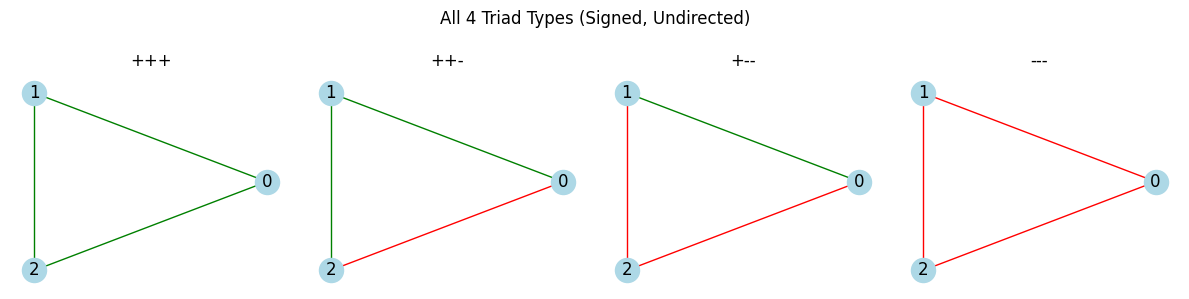

In [16]:
# All 4 undirected triad types (signs represent edge weights)
triads = {
    "+++": [(0, 1, 1), (1, 2, 1), (0, 2, 1)],
    "++-": [(0, 1, 1), (1, 2, 1), (0, 2, -1)],
    "+--": [(0, 1, 1), (1, 2, -1), (0, 2, -1)],
    "---": [(0, 1, -1), (1, 2, -1), (0, 2, -1)],
}

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for ax, (label, edges) in zip(axes, triads.items()):
    G = nx.Graph()
    G.add_nodes_from([0, 1, 2])
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.circular_layout(G)
    edge_colors = ["green" if G[u][v]["weight"] > 0 else "red" for u, v in G.edges()]
    nx.draw(
        G, pos, ax=ax, with_labels=True, edge_color=edge_colors, node_color="lightblue"
    )
    ax.set_title(label)

plt.suptitle("All 4 Triad Types (Signed, Undirected)")
plt.tight_layout()

In **directed** graphs, we can have up to 16 triads:

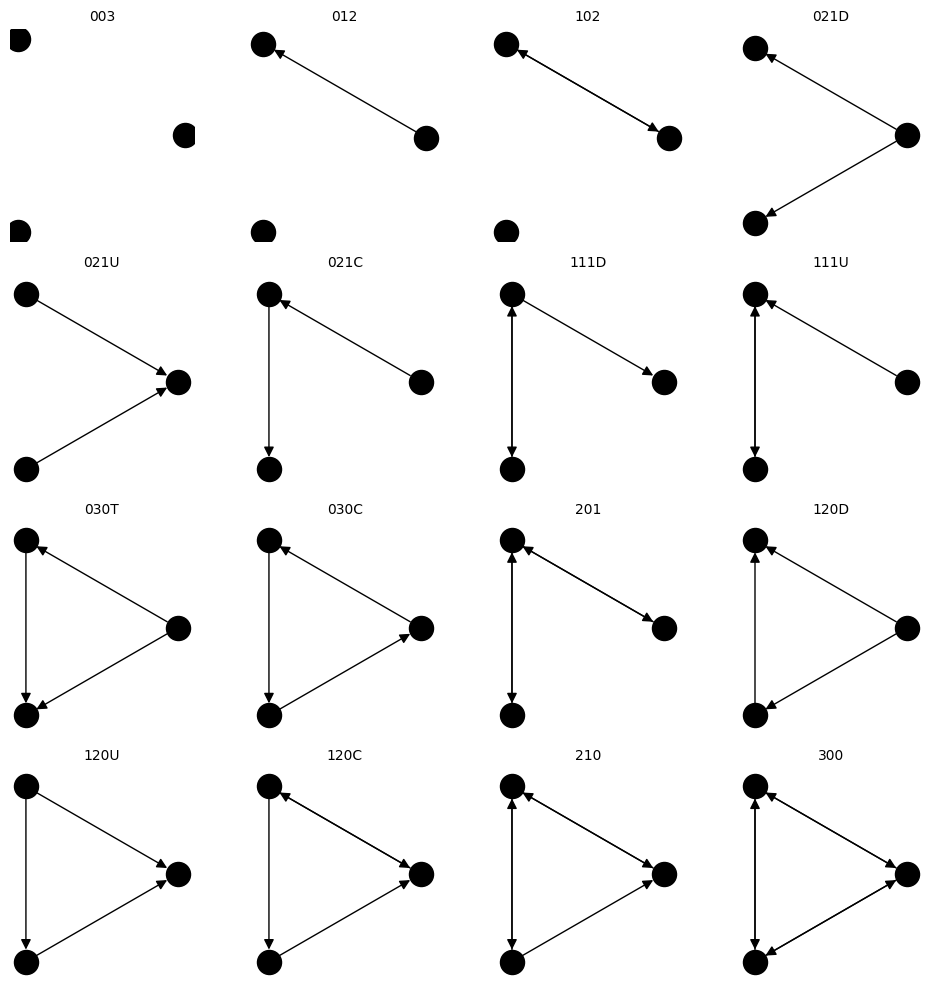

In [17]:
# Define 16 canonical triads from the triad census
triads = {
    "003": [],
    "012": [(0, 1)],
    "102": [(0, 1), (1, 0)],
    "021D": [(0, 1), (0, 2)],
    "021U": [(1, 0), (2, 0)],
    "021C": [(0, 1), (1, 2)],
    "111D": [(1, 0), (1, 2), (2, 1)],
    "111U": [(0, 1), (2, 1), (1, 2)],
    "030T": [(0, 1), (0, 2), (1, 2)],
    "030C": [(0, 1), (1, 2), (2, 0)],
    "201": [(0, 1), (1, 0), (1, 2), (2, 1)],
    "120D": [(0, 1), (0, 2), (2, 1)],
    "120U": [(1, 0), (2, 0), (1, 2)],
    "120C": [(0, 1), (1, 2), (2, 0), (1, 0)],
    "210": [(0, 1), (1, 2), (2, 0), (2, 1), (1, 0)],
    "300": [(0, 1), (1, 0), (1, 2), (2, 1), (2, 0), (0, 2)],
}

# Layout and plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
positions = nx.circular_layout([0, 1, 2])

for ax, (label, edges) in zip(axes.flat, triads.items()):
    G = nx.DiGraph()
    G.add_nodes_from([0, 1, 2])
    G.add_edges_from(edges)
    nx.draw(
        G,
        pos=positions,
        ax=ax,
        with_labels=False,
        node_size=300,
        node_color="black",
        edge_color="black",
        arrowsize=15,
    )
    ax.set_title(label, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Meaning of Letters in Directed Triad Census Labels

Each triad label (e.g., `021C`, `111U`) describes the number and pattern of directed edges among 3 nodes. The format is **XYZL**, where:

- **X**: Number of **mutual dyads** (reciprocated edges, e.g., A→B and B→A)
- **Y**: Number of **asymmetric dyads** (one-way edges)
- **Z**: Number of **null dyads** (no edges between two nodes)
- **L (optional)**: Structural **pattern label** to distinguish multiple triads with the same X, Y, Z

---

#### Pattern Labels (`L` suffix)

| Label | Description                              |
|-------|------------------------------------------|
| `D`   | Downstream pattern (edges flow out)      |
| `U`   | Upstream pattern (edges flow in)         |
| `C`   | Cyclic (edges form a directed cycle)     |
| *(none)* | Unique configuration without variants |

---

#### Examples

- `003`: 0 mutual, 0 asymmetric, 3 null → No edges  
- `012`: 0 mutual, 1 asymmetric, 2 null → One directed edge  
- `021C`: 0 mutual, 2 asymmetric, 1 null → Chain: A→B→C  
- `111D`: 1 mutual, 1 asymmetric, 1 null → Mutual + outgoing edge  
- `300`: 3 mutual → Fully connected and reciprocated

These labels are used in triad census analysis to identify recurring social structures in directed graphs.

### Back to our graph


**Triadic census** is a way to count the number of triads in a graph.

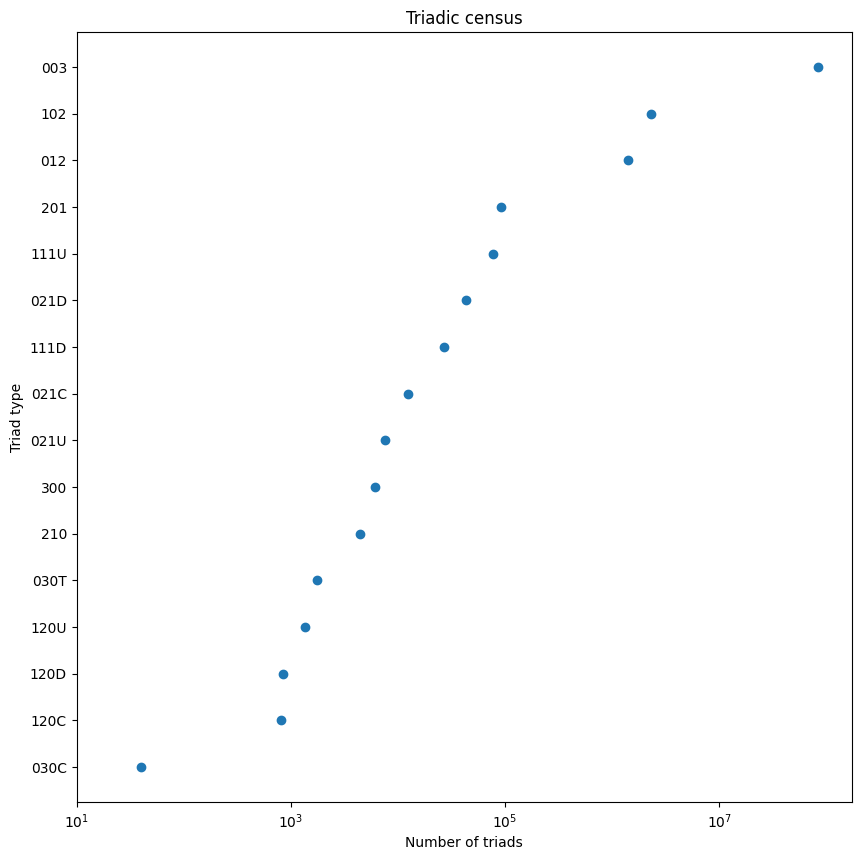

In [18]:
census = nx.triadic_census(H)
census = [(k, v) for k, v in sorted(census.items(), key=lambda x: x[1], reverse=False)]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
y = list(range(len(census)))
x = [v for k, v in census]
ax.plot(np.log10(x), y, "o")
ax.set_yticks(y)
ax.set_yticklabels([c[0] for c in census])
xticks = [1, 3, 5, 7]
xticklabels = [f"$10^{xtick}$" for xtick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel("Number of triads")
ax.set_ylabel("Triad type")
ax.set_title("Triadic census")
plt.show()

**Goal**: Investigate whether triads follow "balance theory" (friend of a friend is a friend, etc.).
- We look at triplets of nodes and check whether their edges align as "balanced" or "unbalanced."

**Note**: This can be computationally heavy for large networks. We might sample a subset of nodes.


### Balanced and Unbalanced Triads in Social Network Analysis

In social network analysis, a **triad** is a group o any three nodes (individuals) and the relationships (edges) between them. **Balance theory**, introduced by Fritz Heider, explains how people prefer to organize social relationships in psychologically stable (or “balanced”) configurations.

#### 🔹 Classic Balance Theory (Unsigned)

A triad is **balanced** if the product of the signs of all three edges (positive = friendship, negative = hostility) is **positive**. There are two key balanced configurations:
1. All three nodes are friends: A ↔ B, B ↔ C, A ↔ C (all +).
2. Two people are friends and share a common enemy: A ↔ B, B ↔ C, A ↮ C (+, +, –).

These follow the principles:
- “The friend of my friend is my friend”
- “The enemy of my enemy is my friend”

A triad is **unbalanced** if the product is negative, such as:
- A ↔ B, B ↮ C, A ↮ C (+, –, –): two friends with a shared enemy, but enemies themselves.
- A ↔ B, A ↔ C, B ↮ C (+, +, –): one person is friends with two enemies.

Unbalanced triads are psychologically unstable and tend to evolve toward balance.

#### 🔹 Triads with Signed Weights {+1, 0, –1}

With signed weights, 0 indicates no relationship. Balance is only evaluated over existing edges (non-zero). A triad is:
- **Balanced** if the product of existing edge signs is positive.
- **Unbalanced** if the product is negative.
- **Neutral/undefined** if fewer than three edges exist.


**Important clarification** a triad refers specifically to a **closed triad** — that is, a group of three nodes where all three possible edges exist.
 - The theory only applies the balance rule (product of signs) when the triad is fully connected.
 - A non-closed triad (one or more missing edges) is not evaluated for balance — it’s considered incomplete, not a true triad in this context.

#### 🔹 Examples

✅ Balanced:
- (+1, +1, +1): all friends  
- (+1, –1, –1): enemy of enemy is a friend  
- (+1, +1, 0): 2 friends, third is neutral

❌ Unbalanced:
- (+1, +1, –1): conflict among friends  
- (–1, –1, –1): all enemies  
- (+1, –1, 0): partial conflict, undefined

In [23]:
import networkx as nx
import matplotlib.pyplot as plt


def get_triad_type(u, v, w, graph: nx.Graph) -> str:
    """
    Classifies the relationship among three nodes as:
    - 'closed': all 3 edges exist
    - 'open': exactly 2 edges exist
    - 'disconnected': fewer than 2 edges

    Parameters:
        u, v, w: node identifiers
        graph: networkx.Graph with 'weight' attributes (optional)

    Returns:
        One of: 'closed', 'open', or 'disconnected'
    """
    pairs = [(u, v), (v, w), (u, w)]
    existing_edges = sum(1 for a, b in pairs if graph.has_edge(a, b))

    if existing_edges == 3:
        return "closed"
    elif existing_edges == 2:
        return "open"
    else:
        return "disconnected"


def is_balanced_triad(u, v, w, graph: nx.Graph):
    """
    Determines if the triad (u, v, w) is balanced.
    Uses unsigned balance theory:
    - Returns True if balanced
    - Returns False if unbalanced
    - Returns None if triad is open or disconnected (i.e., not evaluable)
    """
    triad_type = get_triad_type(u, v, w, graph)

    if triad_type != "closed":
        return None  # Not a full triad, can't evaluate balance

    # All edges exist, so get their weights
    w_uv = np.sign(graph[u][v]["weight"])
    w_vw = np.sign(graph[v][w]["weight"])
    w_uw = np.sign(graph[u][w]["weight"])

    return (w_uv * w_vw * w_uw) > 0

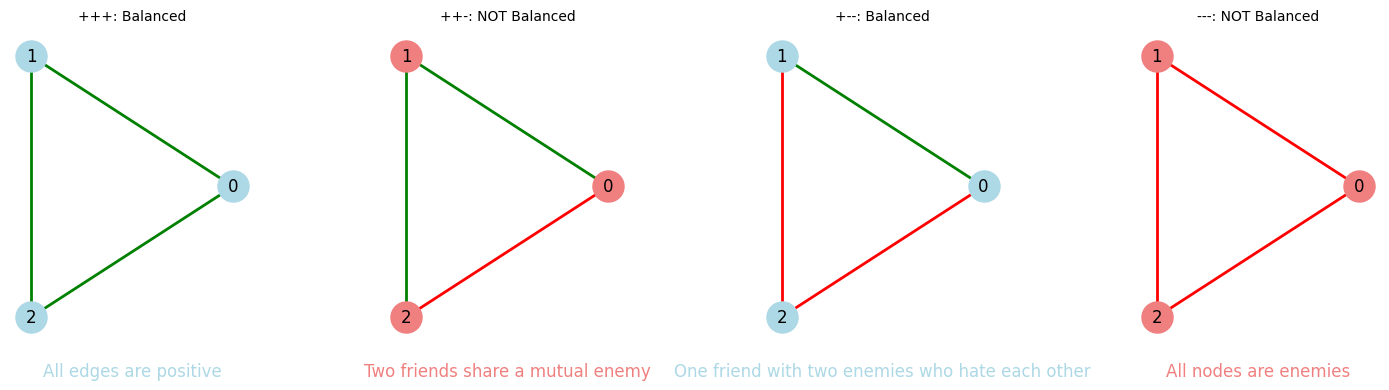

In [24]:
# Normalized triad data with descriptive labels
triads = {
    "+++": ([(0, 1, 1), (1, 2, 1), (0, 2, 1)], "All edges are positive"),
    "++-": ([(0, 1, 1), (1, 2, 1), (0, 2, -1)], "Two friends share a mutual enemy"),
    "+--": (
        [(0, 1, 1), (1, 2, -1), (0, 2, -1)],
        "One friend with two enemies who hate each other",
    ),
    "---": ([(0, 1, -1), (1, 2, -1), (0, 2, -1)], "All nodes are enemies"),
}


fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for ax, (label, (edges, description)) in zip(axes, triads.items()):
    G = nx.Graph()
    G.add_nodes_from([0, 1, 2])
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    balance = is_balanced_triad(0, 1, 2, G)

    pos = nx.circular_layout(G)
    edge_colors = ["green" if G[u][v]["weight"] > 0 else "red" for u, v in G.edges()]
    node_color = "lightblue" if balance else "lightcoral"
    title = f"{label}: {'Balanced' if balance else 'NOT Balanced'}"

    nx.draw(
        G,
        pos,
        ax=ax,
        with_labels=True,
        edge_color=edge_colors,
        node_color=node_color,
        node_size=500,
        width=2,
    )
    ax.set_title(title, fontsize=10)
    ax.text(
        0.5,
        -0.1,
        description,
        transform=ax.transAxes,
        ha="center",
        fontsize=12,
        color=node_color,
    )

plt.tight_layout()
plt.show()

In [21]:
from itertools import combinations


sampled_nodes = H.nodes()

triad_count = 0
triplet_count = 0
balanced_count = 0

for u, v, w in combinations(sampled_nodes, 3):
    triplet_count += 1
    if get_triad_type(u, v, w, H) != "closed":
        continue
    triad_count += 1
    if is_balanced_triad(u, v, w, H):
        balanced_count += 1


print(
    f"Checked {triplet_count:,d}. Of them {triad_count:,} are triads. Of them {balanced_count:,} ({balanced_count/triad_count:.1%}) are balanced."
)
if triad_count > 0:
    print(f"({balanced_count/triad_count*100:.2f}% balanced)")

Checked 87,267,635. Of them 9,706 are triads. Of them 8,544 (88.0%) are balanced.
(88.03% balanced)



### 🔍 Practical Implications of Signed Triad Analysis (Bitcoin Trust Network)

- **High Consistency**: ~99.88% balanced triads suggest users rate others in a socially coherent way.
- **Network Stability**: Balanced structures imply trust is robust and less prone to contradictions.
- **Trust Inference**: Indirect trust (friend of a friend) is reliable, supporting reputation algorithms.
- **Anomaly Detection**: Unbalanced triads may signal noise, fraud, or unusual behavior.
- **System Design**: Useful for building trust mechanisms in decentralized systems (e.g., DeFi, DAOs).

## Gephi

[Gephi](https://gephi.org/) is a tool for visualizing graphs. It's "Excel" for graphs.
To use it, you need to export your graph from NetworkX to a file format that Gephi can read.

In [22]:
# re-load the graph
G = nx.DiGraph()
with open(file_path, "r") as f:
    for line in f:
        fields = line.strip().split(",")
        # Adjust if your CSV has additional columns
        src, tgt, w = fields[0], fields[1], fields[2]
        G.add_edge(src, tgt, weight=float(w))

nx.write_gexf(
    G,
    "bitcoin_otc_network.gexf",
)

## Homework

Identify all the nodes involved in unbalanced triads.

Compare the PageRank, average trust, and trust sum for these nodes to the rest of the network. Use sampling if needed. 

**It it takes more than one hour to complete, load the first 1,000 rows of the dataset.**

What can you say about these nodes?

## 4.5 References and Further Reading

- **Dataset Citation**:
  - S. Kumar et al. (2016, 2018). Papers on Edge Weight Prediction in Weighted Signed Networks.
- **Tool Documentation**:
  - [Plotly](https://plotly.com/python/)
  - [Gephi](https://gephi.org/)
  - [Neo4j Bloom](https://neo4j.com/developer/neo4j-bloom/)
- **Advanced Topics**:
  - Real-time graph updates, streaming data, interactive dashboards, etc.

